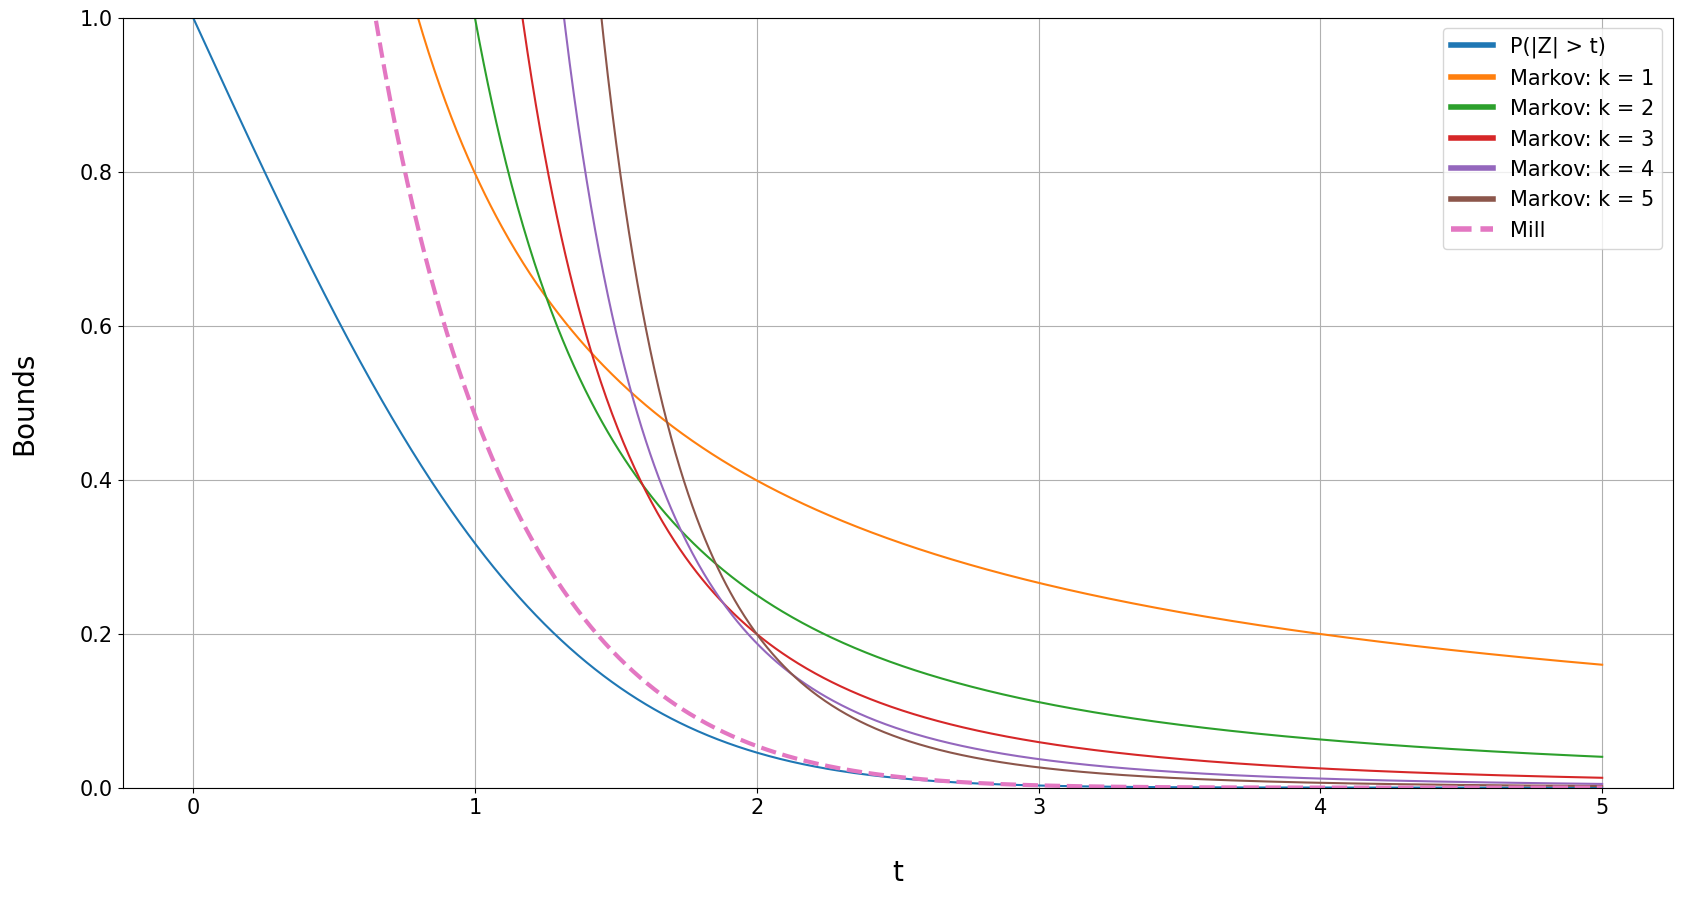

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from functools import lru_cache
from scipy.stats import norm

@lru_cache(maxsize=None)
def e_k(k: int):
    if k == 0:
        return 1
    
    if k == 1:
        return np.sqrt(2/np.pi)
    
    return (k-1) * e_k(k-2)

def e_kt(t, k: int):
    return e_k(k) / t**k

def mill(t):
    return np.sqrt(2/np.pi) * np.exp(-(t**2)/2) / t

t = np.linspace(1e-6, 5, 1000)
pz_t = 2*(1 - norm(0,1).cdf(t))
m_t = mill(t)

plt.figure(figsize=(20, 10))
plt.ylim([0, 1])

plt.plot(t, pz_t)

legends = ['P(|Z| > t)']
for k in range(1, 6):
    plt.plot(t, e_kt(t, k))
    legends.append(f'Markov: k = {k}')

plt.plot(t, m_t, linestyle='dashed', linewidth=3)
legends.append('Mill')

font_size = 20
label_pad = 30

plt.xlabel('t', fontsize=font_size, labelpad=label_pad)
plt.ylabel('Bounds', fontsize=font_size, labelpad=label_pad)

plt.xticks(fontsize=0.75*font_size)
plt.yticks(fontsize=0.75*font_size)

legs = plt.legend(legends, fontsize=0.75*font_size)
for line in legs.get_lines():
    line.set_linewidth(4)

plt.grid()
plt.show()